# Chapter 1_8 自回归
----
Author: W.Y.  
Date: 2020/1/17  
Update: 2020/2/5  
Info: 王汉生老师书的第八章，自回归的python极简实现  

----

In [1]:
# 导入模块

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sma
from statsmodels.graphics.tsaplots import plot_acf  # 自相关系数图
from statsmodels.tsa.ar_model import AR  # 自回归模型

In [2]:
# 导入数据

data = pd.read_csv('E:\Data Mining\SimplePython\Chapter 1 从R到Python\CH 1_8 自回归\CH 1_8 data rate.csv')

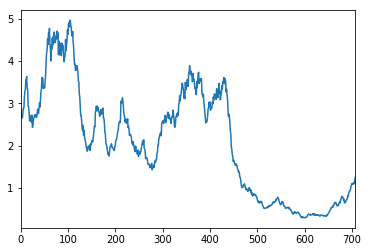

In [3]:
# 时间序列图

data['rate'].plot()

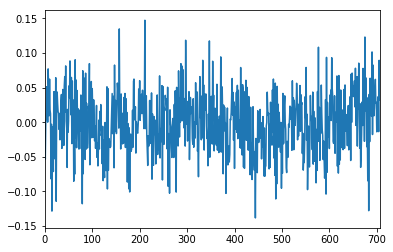

In [4]:
# 序列平稳

log_rate = pd.Series(np.diff(np.log(data['rate'])))
log_rate.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x19fd33ff9e8>,
 'caps': [<matplotlib.lines.Line2D at 0x19fd33ffe10>,
 'boxes': [<matplotlib.lines.Line2D at 0x19fd33ff5f8>],
 'medians': [<matplotlib.lines.Line2D at 0x19fd340b748>],
 'fliers': [<matplotlib.lines.Line2D at 0x19fd340ba90>],
 'means': []}

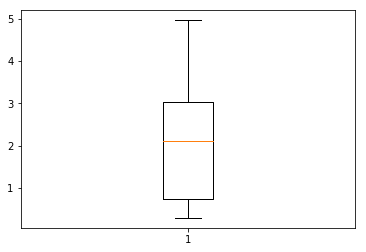

In [5]:
# 描述性分析（箱图）

plt.boxplot(data['rate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19fd3457cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x19fd3463390>,
 'boxes': [<matplotlib.lines.Line2D at 0x19fd3457908>],
 'medians': [<matplotlib.lines.Line2D at 0x19fd3463a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x19fd3463d68>],
 'means': []}

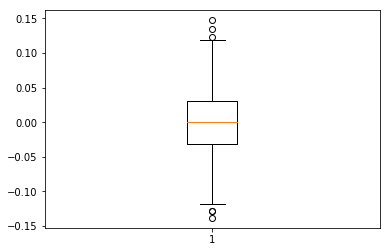

In [6]:
plt.boxplot(log_rate)

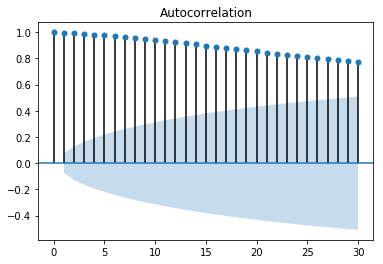

In [7]:
# 自相关系数

plot_acf(data['rate'], lags=30)
plt.show()

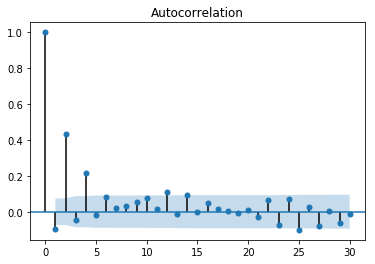

In [8]:
plot_acf(log_rate, lags=30)
plt.show()

In [9]:
# 自回归模型

model1 = AR(log_rate).fit(maxlag=4)
model1.params

const   -0.000542
L1.y    -0.067490
L2.y     0.416741
L3.y     0.029276
L4.y     0.034692
dtype: float64

In [10]:
model2 = AR(log_rate).fit(ic='aic')
model2.params  # 也是为2

const   -0.000546
L1.y    -0.055501
L2.y     0.428805
dtype: float64

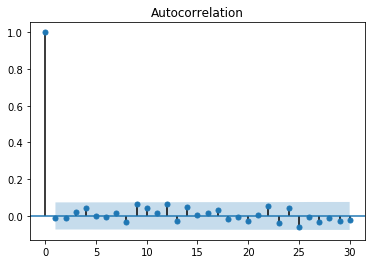

In [11]:
# 模型诊断
# 自相关系数图

plot_acf(model2.resid, lags=30)
plt.show()

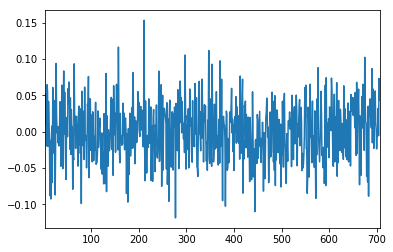

In [12]:
# 残差图

model2.resid.plot()

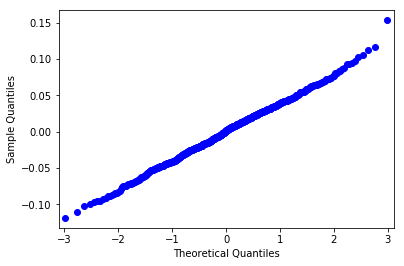

In [13]:
# QQ图

sma.qqplot(model2.resid)
plt.show()

In [14]:
# 预测

log_rate1 = log_rate[0:600]
log_rate2 = log_rate[600]

In [15]:
model3 = AR(log_rate1).fit(maxlag=2)
model3.params

const   -0.002340
L1.y    -0.059263
L2.y     0.399151
dtype: float64

In [16]:
model3.predict(start=600,end=600)

600   -0.003855
dtype: float64

In [17]:
log_rate_true = log_rate[600:706]
log_rate_true = log_rate_true.reset_index(drop=True)

In [18]:
log_rate_predict = list()
for i in range(0,107):
    log_rate_i = log_rate[i:600+i]
    model_i = AR(log_rate_i).fit(maxlag=2)
    predict = pd.DataFrame(model_i.predict(start=600, end=600).values)
    log_rate_predict.append(predict[0][0])


In [19]:
df_log_rate_predict = pd.Series(log_rate_predict)

In [20]:
# 预测误差

np.mean((df_log_rate_predict-log_rate_true)**2)/np.var(log_rate_true)

0.7881337133326286

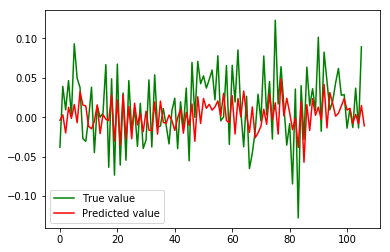

In [21]:
# 真实值和预测值的比较

plt.plot(log_rate_true,color='green', label='True value' )
plt.plot(df_log_rate_predict, color='red', label='Predicted value')
plt.legend()

